In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from qdyn import propagator, animate_dynamics

In [3]:
def V_ground(x):
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te


def V_excited(x):
    de=0.03342
    re=3.03150
    beta=0.19459
    te=0.327
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te

In [4]:
def k_grnd():
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    k_grnd = 2*de*(1/re+2*beta*re)**2
    return k_grnd

In [5]:
from numpy.polynomial.hermite import hermval

def eigen_ho(x,v,m,k):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    
    hermite_sum=zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-x**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * x,hermite_sum) 

In [6]:
import numpy as np
def transition_dipole_moment(x):
    '''Transition dipole moment dependence on the inter-atomic
    coordinate x for the O2 electronic transition.
    The input x, and the output of the function are in atomic units.'''

    #parameters for connecting function
    ss=2
    es=2.28
    plateau=0.266
    peak=0.94

    #step function of order 7 (n=3)
    xs=(x-ss)/(es-ss)
    step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
    step= plateau + (peak-plateau)*step

    #exponential decay for higher x values
    decay=3.85*np.exp(-0.626*x)

    return np.where(x<ss,plateau,np.where(x>es,decay,step))

# Start the codes

Set the mass and ground with excited wavefunction.

In [7]:
m=14583 #reduced mass of O2 in atomic units
x_grid=np.linspace(1,10,10000)

wf_grd = eigen_ho((x_grid-2.29716),0,m,k_grnd())
miu = transition_dipole_moment(x_grid)

wf_exci = wf_grd*miu

Test the plot if they're correct.

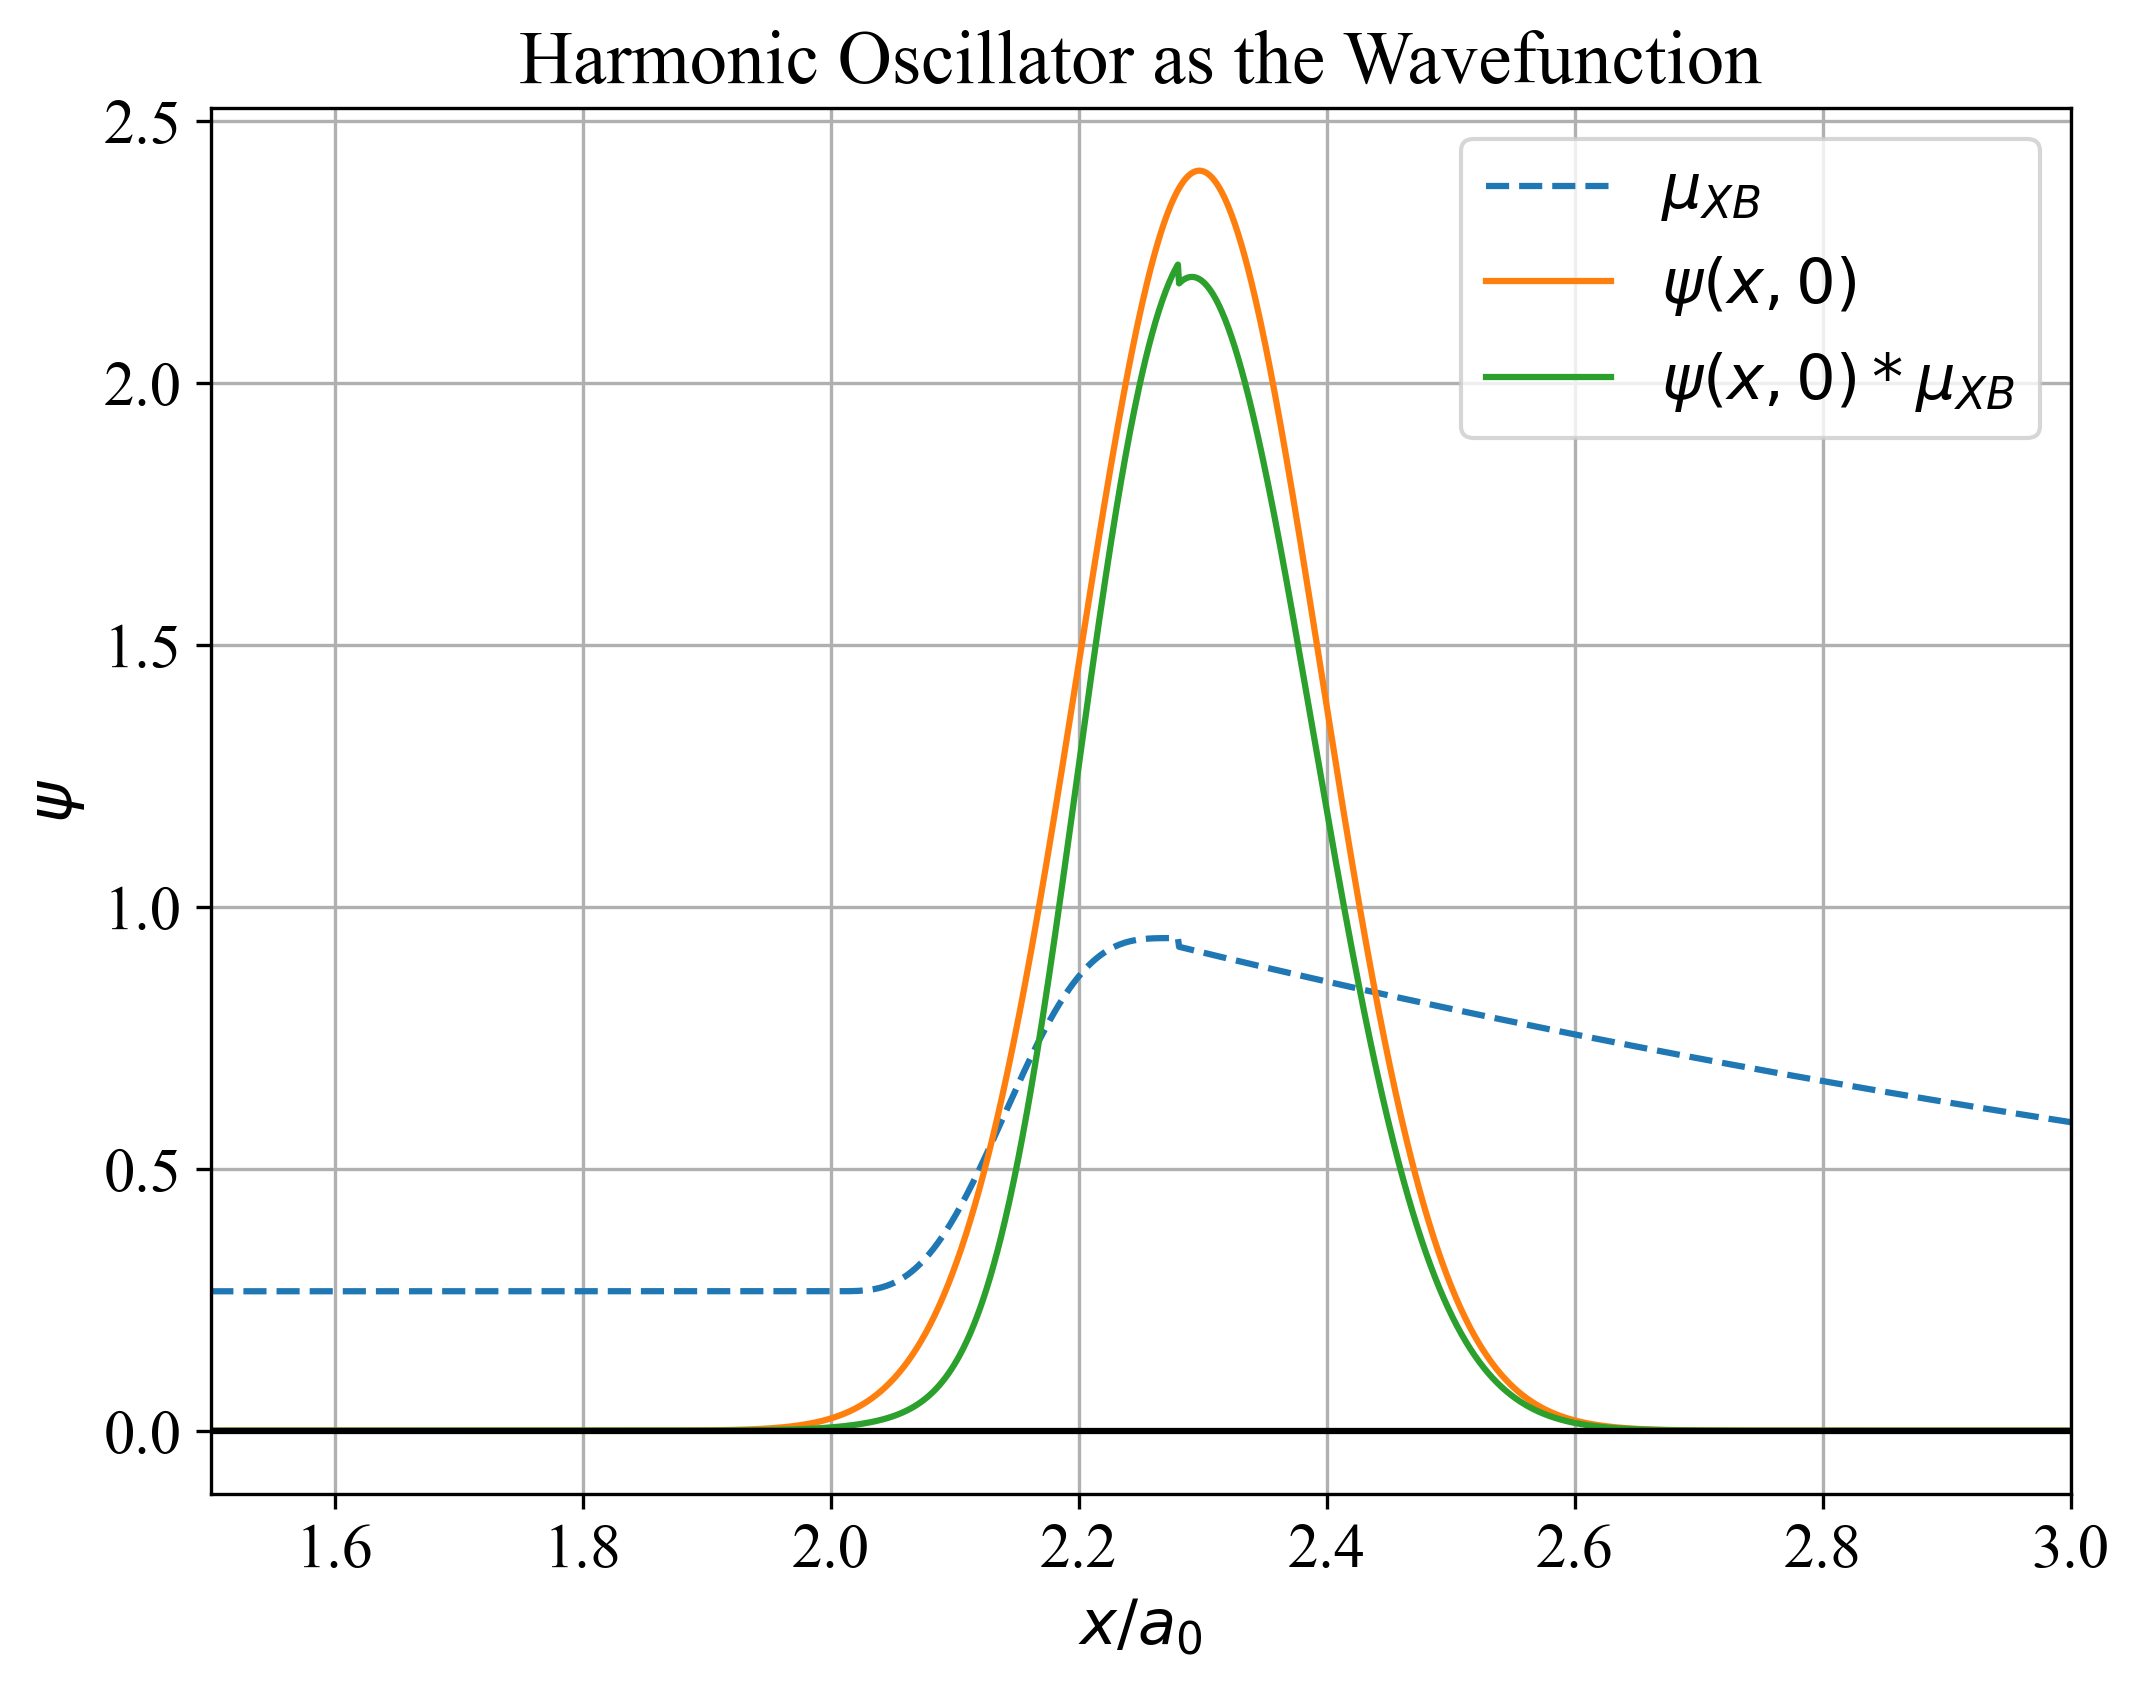

In [119]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plt.plot(x_grid,miu,label='$\mu_{XB}$',linestyle = '--')
plt.plot(x_grid,wf_grd,label='$\psi(x,0)$')
plt.plot(x_grid,wf_exci,label='$\psi(x,0)*\mu_{XB}$')

# Add styles for the graph
plt.title("Harmonic Oscillator as the Wavefunction")

plt.xlabel("$x/a_0$")
plt.ylabel('$\psi$')

plt.xlim([1.5,3])
#plt.ylim()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend()
plt.show()


Animate the wavefunction on the excited potential.

In [19]:
30000*0.05

1500.0

In [20]:
dt=0.05
nsteps=30000

wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=wf_exci


for step in range(nsteps):
    psi_exi=propagator(x_grid,wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi
    
wf_dynamics_exi[1:] = wf_dynamics_exi[1:]*miu

#animate_dynamics(x_grid,wf_dynamics_exi,dt,V_excited(x_grid))

In [24]:
t_series = arange(0,nsteps+1)*dt


#### first trial results

In [27]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[::50],x_grid[::50])
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))

xlim([0,1])

plot(frequency[::50],gauss_w,marker = '.')


ValueError: operands could not be broadcast together with shapes (1,199) (601,9999) 

In [11]:
E_grd

NameError: name 'E_grd' is not defined

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plt.plot(t_series,autocor_int)

# Add styles for the graph
plt.title(r'Autocorrelation function $\langle\phi(x,0)|\phi(x,t)\rangle$')

plt.ylabel(r'$\langle\phi(x,0)|\phi(x,t)\rangle$')
plt.xlabel('t / a.u.')

plt.xlim([0,200])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

#plt.legend()
plt.show()

In [26]:
print(gauss_w.argmax())

frequency[0]


256


-0.6262310937388292

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plot(frequency,gauss_w,marker = '.')
plot(array([0.44253663957543937,0.44253663957543937]), array([0,3]),linestyle = '--', label=r'Peak at $\omega$ = 0.443')
# Add styles for the graph
plt.title(r'Power spectrum S($\omega$) (dt=5, steps=300)')

plt.ylabel('S($\omega$)')
plt.xlabel('$\omega$ / a.u.')

plt.xlim([0,1])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend()
plt.show()

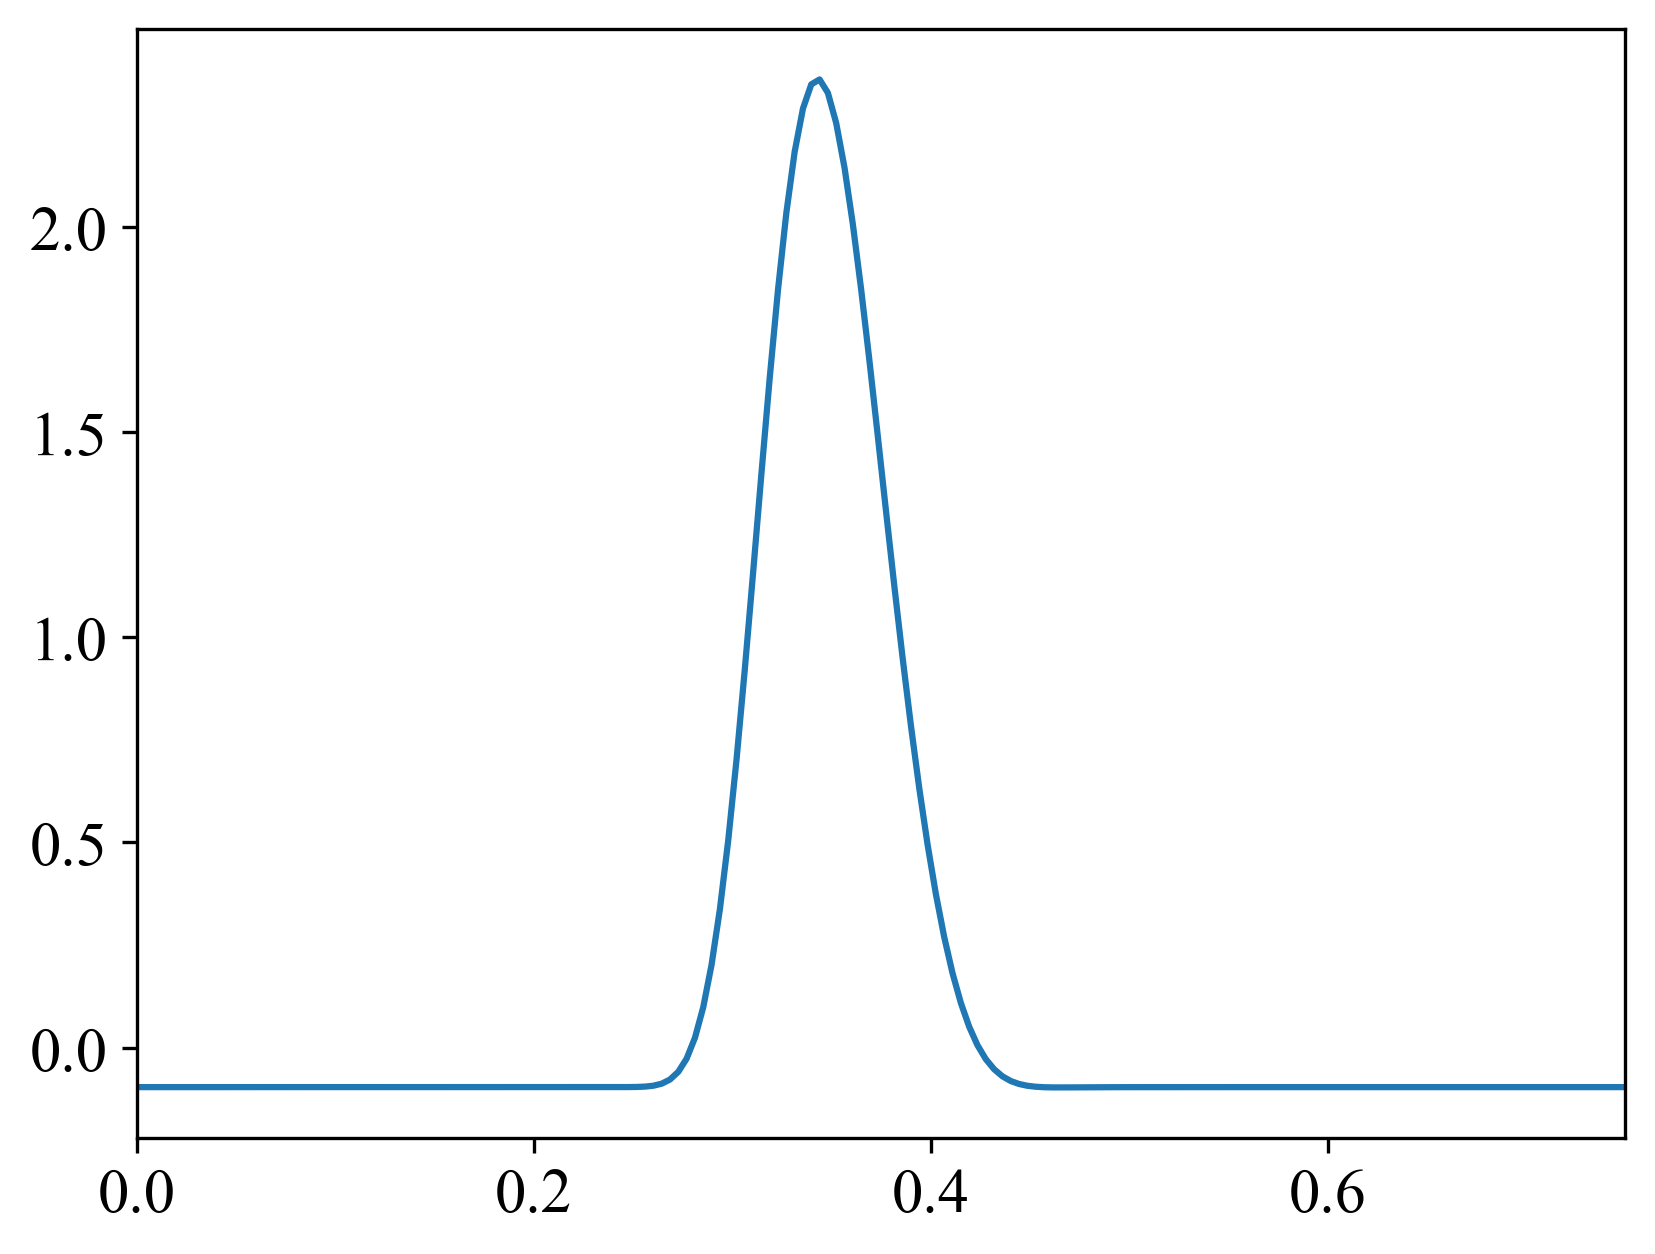

In [121]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[:],x_grid)
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))

te = 0.1
E_grd = 1/2 * (k_grnd()/m) + te
gauss_w_subsEgrd = gauss_w - E_grd

AbsoSpec = (2*pi*frequency)/(3*137.037) * gauss_w *(2*pi)**0.5

xlim([0,0.75])
plot((frequency-E_grd),gauss_w_subsEgrd)

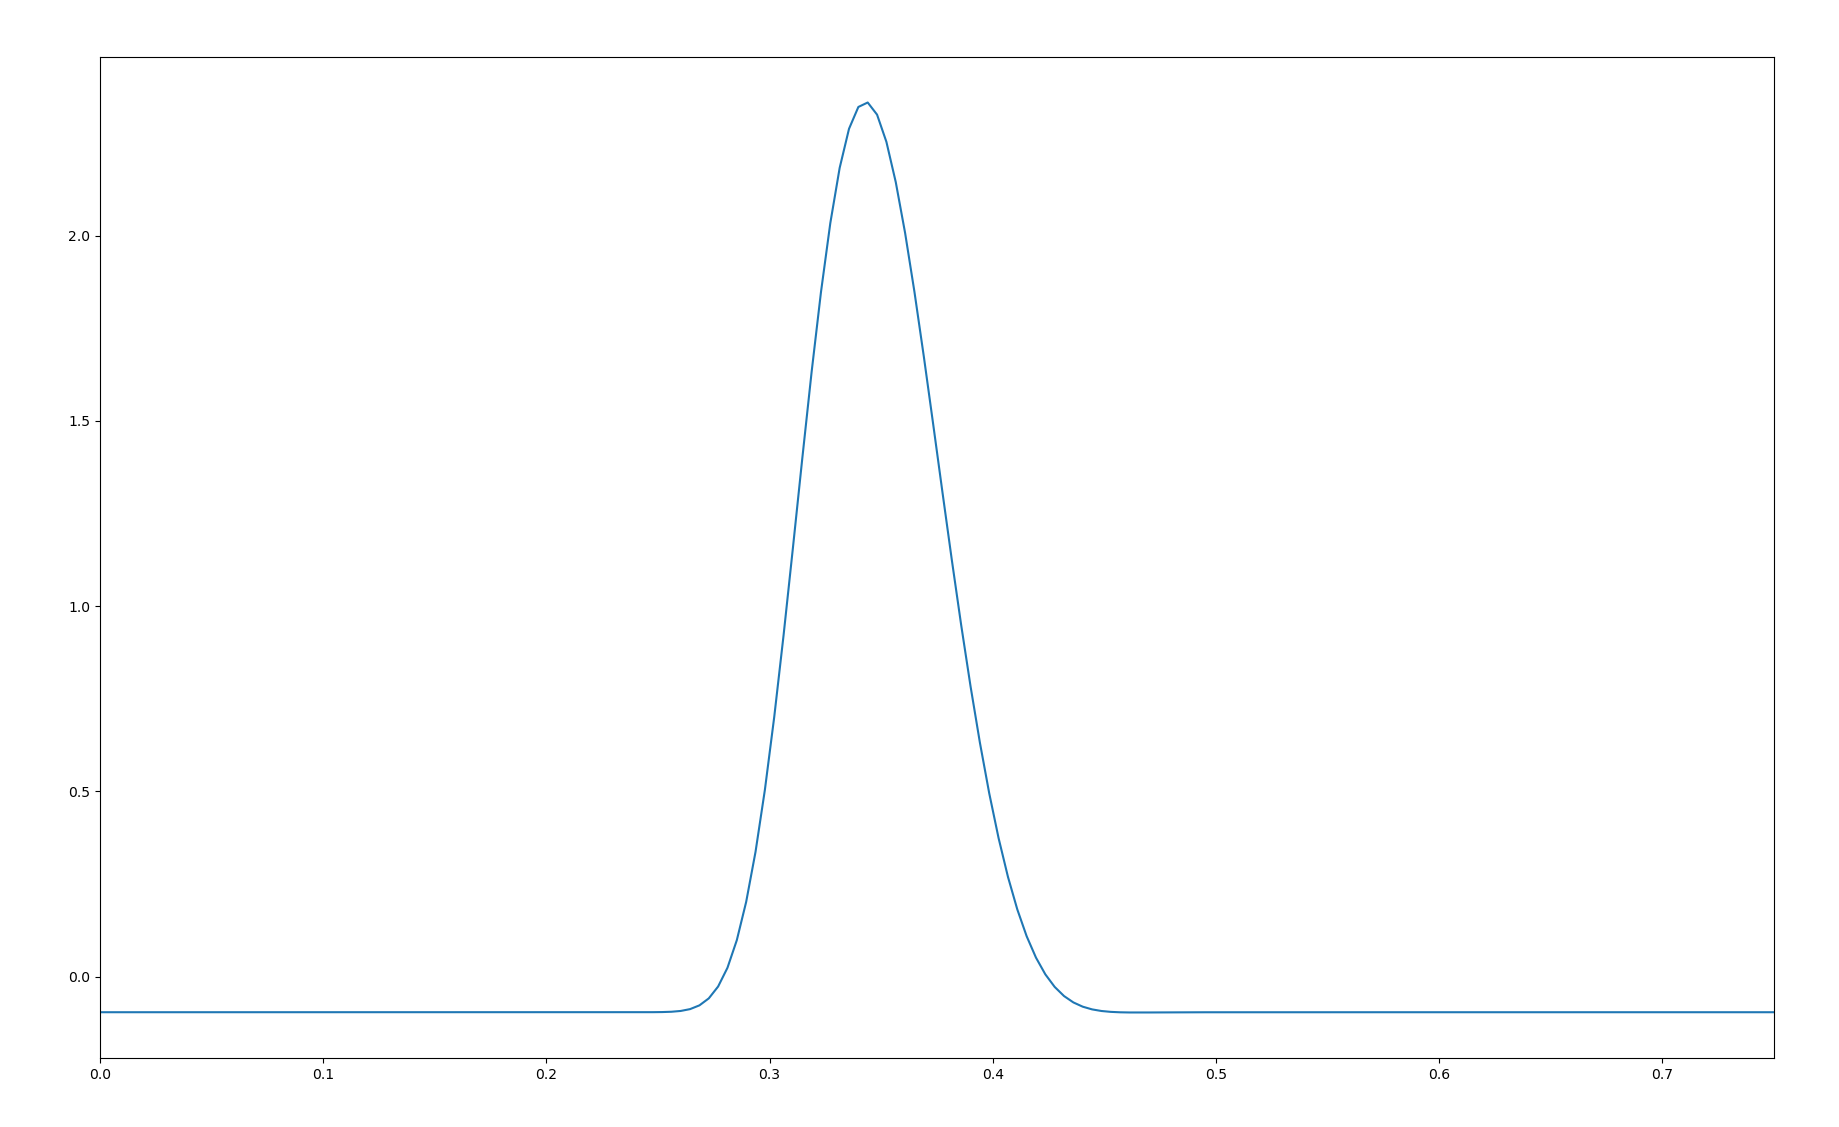

### Find peaks and find peak value of the frquency

In [70]:
from scipy.signal import find_peaks

gauss_w_subsEgrd.argmax()

peakmax = frequency-E_grd
peak_value = peakmax[7606]
peak_value

0.3439562433720408

### Try to substrate E_grd from the inverse value

### Give the power spec.

1. a qualitative description of how the wavefunction changes with time and how this relate to the spectrum. 

1.1 to consider the main dynamics features, but also the details of the dynamics inside the excited state potential well.

- (i.e. autocorrelation function) or explicitly calculated in your analysis. 
- expectation value of the position changes with times; 
- or how the spread in positions changes in time.

### Expectation value for the position

In [71]:
def exp_x(i):
    del_x_02 = trapz(conj(wf_dynamics_exi[i]) * x_grid * wf_dynamics_exi[i],x_grid)
    return del_x_02


expected_x_list = []

for i in range(len(wf_dynamics_exi)):
    expected_x_list.append(exp_x(i))

plot(expected_x_list)

In [ ]:
## peak value

### Spread in position

In [14]:
def sprdX(t):
    del_x_01 = trapz(conj(wf_dynamics_exi[t]) * x_grid**2 * wf_dynamics_exi[t])
    del_x_02 = trapz(conj(wf_dynamics_exi[t]) * x_grid * wf_dynamics_exi[t])
    del_x = del_x_01-del_x_02**2
    return del_x

In [16]:
spread_x_list = []

for i in range(len(wf_dynamics_exi)):
    spread_x_list.append(sprdX(i)-sprdX(0))

plot(spread_x_list)

In [17]:
plot(spread_x_list)

In [29]:
del_x_0

(0.8614946486583479+0j)

## Question 2: FCF

In [72]:
t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_value+E_grd+0.1)*t_grid)
integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics_exi[0])):
    integrandd4=shif4*wf_dynamics_exi[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))


plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_4^A(x))$',color="red")
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_4^A(x)|$',color="red",linestyle="--")


In [61]:
%matplotlib qt



t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_value+E_grd+0.1)*t_grid)
integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics_exi[0])):
    integrandd4=shif4*wf_dynamics_exi[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))




%matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.figure(figsize=(10,10))
#plt.plot(x_grid,-np.real(newwf3/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid))),label='$Re(\Lambda_3^A(x))$',color="blue")
#plt.plot(x_grid,np.abs(newwf3)/np.sqrt(np.trapz(abs(np.array(newwf3))**2,x_grid)),label='$|\Lambda_3^A(x)|$',color="blue",linestyle="--")

plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_4^A(x))$',color="red")
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_4^A(x)|$',color="red",linestyle="--")

plt.ylabel(r'$\varphi(x)$')
plt.xlabel('x / a0')
plt.legend()
plt.grid()
plt.xlim(0,12)
plt.savefig('excitedv9')

KeyboardInterrupt: 

In [168]:
# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(autocor_int,norm="ortho")) 
spec = (2*pi)**(3/2)/(3*137.037)*gauss_w


# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2 * pi * fftshift(fftfreq(nsteps,d=dt))

spec_frq = spec[1:]*frequency


plot(frequency,spec_frq) # Plot the transformed function
show()



In [44]:
x=np.linspace(1,6,500)

plt.plot(x,V_ground(x))
plt.plot(x,V_excited(x))
plt.plot(x,)

plt.ylim([0,3])

(0.0, 3.0)

In [45]:
plt.plot(x,)


plt.ylim([0,3])

(0.0, 3.0)

In [100]:
m=14583 #reduced mass of O2 in atomic units
dt=10 #time step in atomic units (this is a relatively big step)

x_grid=np.linspace(1,6,500)
psi0 = eigen_ho((x_grid-2.29716),0,m,k_grnd())
new_wf=propagator((x_grid-2.29716),psi0,m,dt,V_ground)


plt.plot(x_grid,psi0)
plt.plot(x_grid,new_wf)
plt.plot(x_grid,V_ground(x_grid))

D:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [110]:
dt=1
nsteps=500

x_grid=np.linspace(1,6,500)
psi0=eigen_ho((x_grid-2.29716),5,m,k_grnd())

wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))

In [93]:
trapz(wf_dynamics[0],wf_dynamics[0])

(-2.3697074988954016e-54+0j)

In [ ]:
conj(wf_dynamics[0])*wf_dynamics

In [33]:
m=14583 #reduced mass of O2 in atomic units
dt=1
nsteps=500

x_grid=np.linspace(1,6,500)

wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

    
animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))


In [1]:
m=14583 #reduced mass of O2 in atomic units
dt=0.00001
nsteps=50000

x_grid=np.linspace(1,6,500)

psi0=eigen_ho((x_grid-2.29716),0,m,k_grnd())
wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

    

psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())
wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-2.29716),wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi    
    
#animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))



autocor_int = trapz(conj(wf_dynamics[0])*wf_dynamics_exi[1:],x_grid)



# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(autocor_int,norm="ortho")) 
spec = (2*pi)**(3/2)/(3*137.037)*gauss_w * TDM(2.29716)**2



# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2 * pi * fftshift(fftfreq(nsteps,d=dt))

spec_frq = spec*frequency

plot(frequency,abs(spec_frq)) # Plot the transformed function
xlim([0,1500])
show()

NameError: name 'np' is not defined

In [8]:
def V_harm(x,x0,k):
    "Harmonic oscillator"
    return k/2*(x-x0)**2

m=14583 #reduced mass of O2 in atomic units
dt=0.1
nsteps=5000

x_grid=np.linspace(1,5.5,1000)


psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())
wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-3.03150),wf_dynamics_exi[step],m,dt,V_harm,3.03150,k_grnd())
    wf_dynamics_exi[step+1]=psi_exi    
    
animate_dynamics(x_grid,wf_dynamics_exi,dt,V_harm(x_grid,3.03150,k_grnd()))

In [20]:
# Final version


m=14583 #reduced mass of O2 in atomic units
dt=0.01
nsteps=500

x_grid=np.linspace(1,5.5,1200)

psi0=eigen_ho((x_grid-2.29716),0,m,k_grnd())
psi0_exi=TDM(psi0)

#psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())

wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-2.29716),wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi    
    
animate_dynamics(x_grid,wf_dynamics_exi,dt,V_ground(x_grid))

In [16]:
# Final version
m=14583 #reduced mass of O2 in atomic units
dt=0.001
nsteps=50000

x_grid=np.linspace(1,5.5,1200)

psi0=eigen_ho((x_grid-2.29716),0,m,k_grnd())
psi0_exi=TDM(psi0)

#psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())


autocor_int = trapz(conj(psi0)*wf_dynamics_exi[1:],x_grid)


# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(autocor_int,norm="ortho")) 
spec = (2*pi)**(3/2)/(3*137.037)*gauss_w * TDM(2.29716)**2


# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2 * pi * fftshift(fftfreq(nsteps,d=dt))

spec_frq = spec*frequency


plot(frequency,abs(spec_frq)) # Plot the transformed function
xlim([0,100])
show()

In [67]:
plot(abs(autocor_int))


In [62]:
plot(frequency,abs(spec_frq)) # abs spectrum
plot(frequency,abs(gauss_w)) #power spectrum
plot(frequency,abs(gauss_w * TDM(2.29716)**2)) 



xlim([0,400])

(0.0, 400.0)

In [ ]:
dt=0.001
nsteps=50000

x_grid=np.linspace(1,5.5,500)